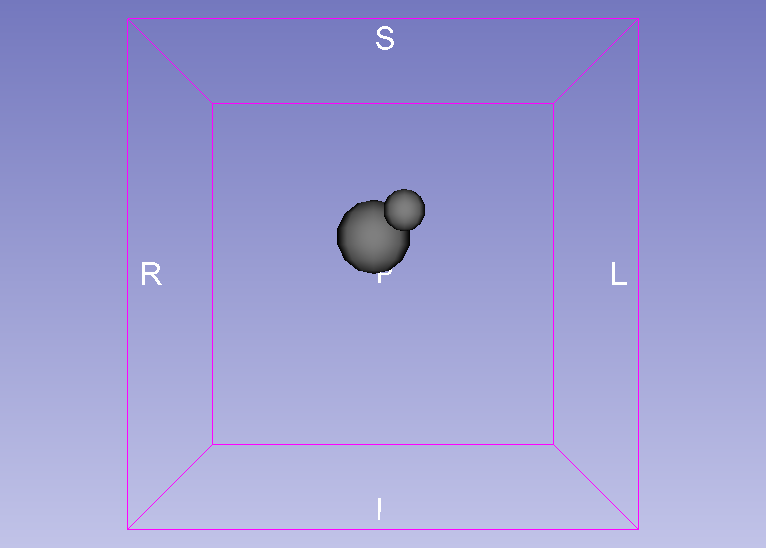

In [1]:
model1 = vtk.vtkSphereSource()
model1.SetCenter(-10, 20, 30)
model1.SetRadius(10)
modelNode1 = slicer.modules.models.logic().AddModel(model1.GetOutputPort())

model2 = vtk.vtkSphereSource()
model2.SetCenter(5, -50, 20)
model2.SetRadius(20)
modelNode2 = slicer.modules.models.logic().AddModel(model2.GetOutputPort())

slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutOneUp3DView)
display()

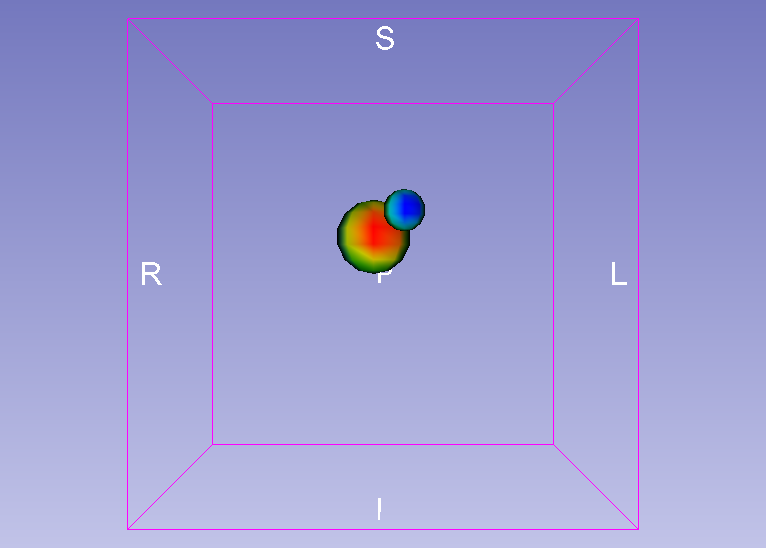

In [2]:
distanceFilter = vtk.vtkDistancePolyDataFilter()
distanceFilter.SetInputConnection(0, modelNode1.GetPolyDataConnection())
distanceFilter.SetInputConnection(1, modelNode2.GetPolyDataConnection())
distanceFilter.SignedDistanceOn()
distanceFilter.Update()
modelNode1.SetAndObservePolyData(distanceFilter.GetOutput())
modelNode2.SetAndObservePolyData(distanceFilter.GetSecondDistanceOutput())

modelNode1.GetDisplayNode().SetActiveScalar('Distance', vtk.vtkAssignAttribute.POINT_DATA)
modelNode1.GetDisplayNode().ScalarVisibilityOn()
modelNode1.GetDisplayNode().AutoScalarRangeOn()

modelNode2.GetDisplayNode().SetActiveScalar('Distance', vtk.vtkAssignAttribute.POINT_DATA)
modelNode2.GetDisplayNode().ScalarVisibilityOn()
modelNode2.GetDisplayNode().AutoScalarRangeOn()

display()

In [3]:
distances1 = slicer.util.arrayFromModelPointData(modelNode1, 'Distance')
print('Minimum distance: '+str(distances1.min()))

Minimum distance: 43.5521552686


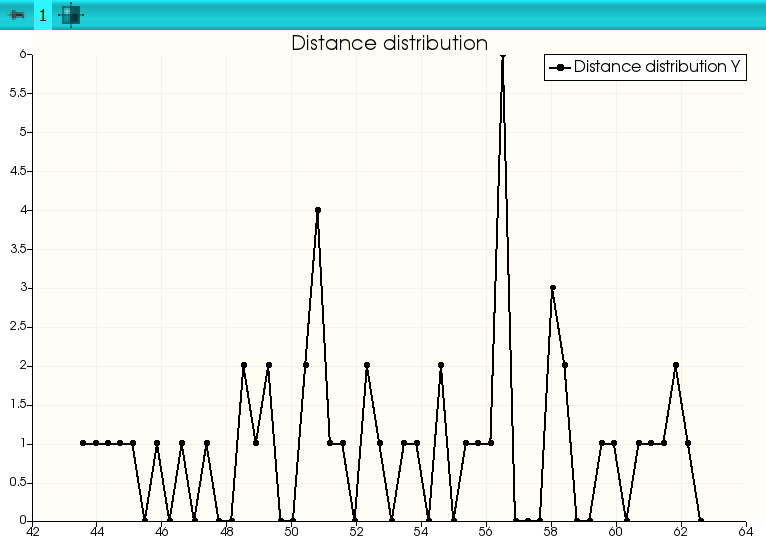

In [4]:
import numpy as np
distanceDistribution = np.histogram(distances1, bins=50)
slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutOneUpPlotView)
slicer.util.plot(distanceDistribution, xColumnIndex=1, title='Distance distribution')
display()